<h1>Finding the features that distinguish high- and low-income people.</h1>

<h2><a name="contents">Contents:</a></h2>
<ul>
    <li><a href="#projectobgective">Project Objective</a></li>
    <li><a href="#importrequiredlibraries">Import Required Libraries</a></li>
    <li><a href="#datapreprocessing">Data Preprocessing</a></li>
    <li><a href="#exploratorydataanalysis">Exploratory Data Analysis</a></li>
    <li><a href="#machinelearning">Machine Learning</li>
    <li><a href="#projectsumary">Project Sumary</li>
</ul>

<h2><a name="projectobgective">Project Objective</a></h2>
<p>The goal is to explore the data and identify the differences between individuals earning a high annual income (more than $50 000 per year) and those earning a low income (below this amount)</p>

<h4>Tools Used:</h4>
<ul>
<li>Programming Language: <i>Python</i></li>
<li>Libraries: <i>Pandas, Numpy, Matplotlib, Seaborn, Sklearn</i></li>
<li>IDE: <i>Jupyter Notebook</i></li>
</ul>

<h2><a name="importrequiredlibraries">Import Required Libraries</a></h2>
<p><a href="#datapreprocessing"> >> to Data Preprocessing</a></p>

In [1]:
import numpy as np
import pandas as pd
from time import time

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output, Image, display
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, fbeta_score, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

<h2><a name="datapreprocessing">Data Preprocessing</a></h2>

<h4>Actions included:</h4>

<ul>
    <li>Loading data from the datasal.csv file and displaying the first five rows for review</li>
    <li>Obtaining information about the data size and data types in the dataset</li>
    <li>Looking for missing data</li>
</ul>

<p><a href="#exploratorydataanalysis"> >> to Exploratory Data Analysis</a></p>

In [2]:
df = pd.read_csv('data//income_data.csv')
df.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [3]:
df.shape

(45222, 14)

In [4]:
df.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [5]:
df.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<h2>Dataset Overview:</h2>

<p>We have access to 45,222 records across 14 features.</p>

<h4>Categorical Features:</h4>

<ul>
    <li>workclass (object) - type of employment</li>
    <li>education_level (object) - level of education</li>
    <li>marital-status (object) - marital status</li>
    <li>occupation (object) - occupation</li>
    <li>relationship (object) - relationship status</li>
    <li>race (object) - race</li>
    <li>sex (object) - gender</li>
    <li>native-country (object) - country of origin</li>
    <li>income (object) - income level</li>
</ul>

<h4>Numerical Features:</h4>

<ul>
    <li>age (int64) - age;</li>
    <li>education-num (float64) - years of education</li>
    <li>capital-gain (float64) - capital gains</li>
    <li>capital-loss (float64) - capital losses</li>
    <li>hours-per-week (float64) - hours worked per week</li>
</ul>

<p>After the initial dataset analysis, it is evident that the data types match the content of the features. The only difference lies in the naming convention of features. For example, education_level uses "snake-case" while other compound feature names use "-".</p>
<h5>Considering the recommendations of many SQL databases regarding the use of "snake-case" in column names, we will standardize the feature names accordingly.</h5>

In [6]:
df = df.rename(columns=lambda x: x.replace('-', '_'))
df.columns

Index(['age', 'workclass', 'education_level', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

<h5>Let's remove any possible extra spaces.</h5>

In [7]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.strip()

<h2>Data Preprocessing Sumary:</h2>
<ul>
    <li>The dataset contains correct data types corresponding to the feature descriptions.</li>
    <li>No missing data found.</li>
    <li>Duplicate detection was not performed due to the absence of unique identifiers or combinations of features necessary for accurate identification of unique records. The presence of records with identical features does not automatically allow us to exclude them as duplicates</li>
    <li>We also standardized the feature names for better readability and in accordance with the recommendations of major SQL databases.</li>
</ul>

<h2><a name=exploratorydataanalysis>Exploratory Data Analysis:</a></h2>

<h4>Actions included:</h4>

<ul>
    <li>Studying quantitative features using the <i>describe</i> method</li>
    <li>Exploring the distribution of quantitative features</li>
</ul>

<p></p>
<p><a href="#datapreprocessing"><< to Data Preprocessing</a></p>
<p><a href="#machinelearning">to Machine Learning >></a></p>

In [8]:
df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


<h5>By applying the describe method, we can draw some initial conclusions:</h5>

<p>The average profile of a person in our dataset:</p>
<ul>
    <li>age - 38.55 years</li>
    <li>education - 10 years</li>
    <li>works 40 hours per week</li>
</ul>

<p>For the <i>age, education_num</i>, and <i>hours_per_week</i> features, the mean and median values are approximately equal. This may indicate a symmetrical distribution of data, but the possible influence of outliers should be considered. The standard deviation for these features ranges from 2.55 to 13.21, indicating a relatively small spread of data around the mean value.</p>

<p>Upon initial examination of the <i>hours_per_week</i> feature, we can observe a peculiarity - the minimum value is 1, while the maximum value is 99. This may indicate the presence of outliers or anomalies in this feature, or it may simply reflect different types of employment or non-standard work schedules.</p>

<p>The <i>capital_gain</i> and <i>capital_loss</i> features exhibit high dispersion and wide variability relative to the mean. This may indicate a non-normal distribution of data in these features. Additionally, the presence of significantly different maximum values may also indicate the presence of outliers or unusual data.</p>

<p>For a more precise determination of the distribution characteristics of the data and the identification of anomalies, it is recommended to conduct additional analyses and visualizations, such as constructing box plots or histograms.</p>

<p>We will consider the features <i>capital_gain</i> and <i>capital_loss</i> separately since the describe method has shown that the main value for these features is 0, while the other values are outliers, especially for <i>capital_gain</i>, where the maximum value significantly exceeds the 75th percentile.</p>

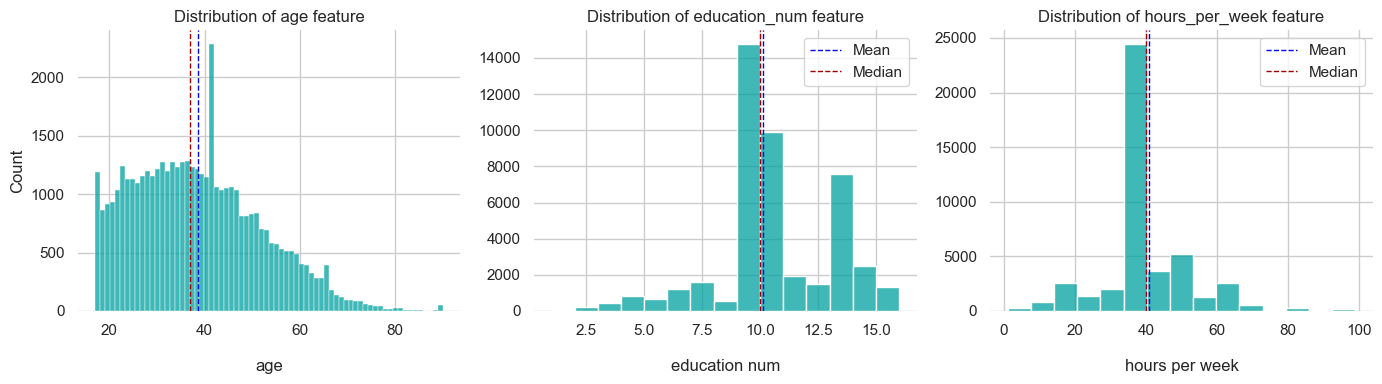

In [9]:
plt.figure(figsize=(14, 4))
sns.set(style="whitegrid")

plt.subplot(1, 3, 1)
plt.box(False)
sns.histplot(df['age'], bins=70, color='#00A0A0')
plt.axvline(df['age'].mean(), color='blue', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['age'].median(), color='#A00000', linestyle='dashed', linewidth=1, label='Median')
plt.title('Distribution of age feature')
plt.xlabel(xlabel='age', labelpad=15)

plt.subplot(1, 3, 2)
plt.box(False)
sns.histplot(df['education_num'], bins=15, color='#00A0A0')
plt.axvline(df['education_num'].mean(), color='blue', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['education_num'].median(), color='#A00000', linestyle='dashed', linewidth=1, label='Median')
plt.title('Distribution of education_num feature')
plt.xlabel(xlabel='education num', labelpad=15)
plt.ylabel('')
plt.legend()

plt.subplot(1, 3, 3)
plt.box(False)
sns.histplot(df['hours_per_week'], bins=15, color='#00A0A0')
plt.axvline(df['hours_per_week'].mean(), color='blue', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['hours_per_week'].median(), color='#A00000', linestyle='dashed', linewidth=1, label='Median')
plt.title('Distribution of hours_per_week feature')
plt.xlabel(xlabel='hours per week' , labelpad=15)
plt.ylabel('')
plt.legend()

plt.tight_layout()
plt.show()


<h5>The histogram overall confirms our conclusions regarding the distribution for the features <i>age</i>, <i>education_num</i>, and <i>hours_per_week</i>. However, it is worth noting a few peculiarities:</h5>
<ul>
    <li>for the <i>age</i> feature, we observe an increase in the frequency of observations around 42 years, which may indicate the presence of some factor specific to this age group</li>
    <li>for the <i>education_num</i> feature, there is an increase in the frequency of observations around the value of 14</li>
</ul>

<h5>Now, let's create box plots for the same features.</h5>

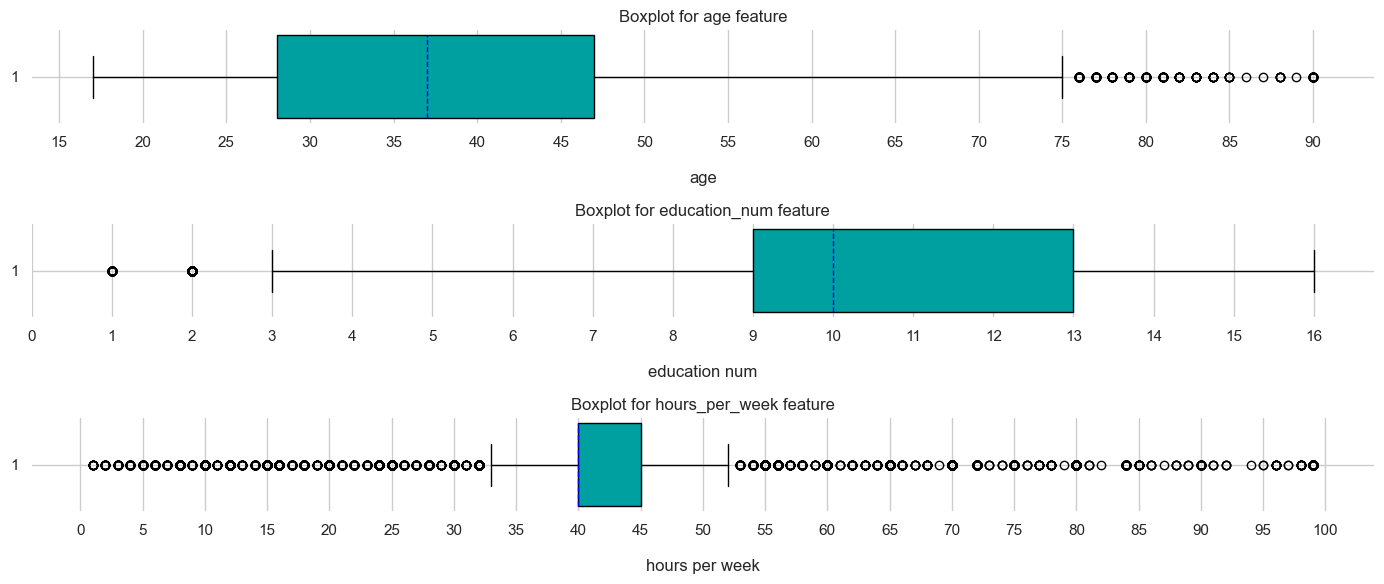

In [10]:
plt.figure(figsize=(14, 6))

plt.subplot(3, 1, 1)
plt.boxplot(df['age'], vert=False, widths=0.9, patch_artist=True, boxprops=dict(facecolor='#00A0A0'),medianprops=dict(color='blue', linestyle='dashed'))
plt.box(False)
custom_ticks = np.arange(15, 95, 5)
plt.xticks(custom_ticks)
plt.xlabel('age', labelpad=15)
plt.title('Boxplot for age feature')

plt.subplot(3, 1, 2)
plt.boxplot(df['education_num'], vert=False, widths=0.9, patch_artist=True, boxprops=dict(facecolor='#00A0A0'),medianprops=dict(color='blue', linestyle='dashed'))
plt.box(False)
custom_ticks = np.arange(0, 17, 1)
plt.xticks(custom_ticks)
plt.xlabel('education num', labelpad=15)
plt.title('Boxplot for education_num feature')

plt.subplot(3, 1, 3)
plt.boxplot(df['hours_per_week'], vert=False, widths=0.9, patch_artist=True, boxprops=dict(facecolor='#00A0A0'),medianprops=dict(color='blue', linestyle='dashed'))
plt.box(False)
custom_ticks = np.arange(0, 105, 5)
plt.xticks(custom_ticks)
plt.xlabel('hours per week', labelpad=15)
plt.title('Boxplot for hours_per_week feature')

plt.tight_layout()
plt.show()


<h5>Studying the Boxplot has allowed us to make the following additional conclusions:</h5>
<ul>
    <li>For the feature age, normal values range from 16 to 75 years. There are a few outliers, but the median value is not shifted towards larger values.</li>
    <li>The feature education_num has almost no outliers.</li>
    <li>The feature hours_per_week has normal values ranging from approximately 33 to 52 years and has outliers on both sides. However, their quantity is not large. Also, we don't have data on the schedule and nature of work for these individuals, so we will not remove these data.</li>
</ul>

<h5>Now let's return to considering the features <i>capital_gain</i> and <i>capital_loss.</i></h5>

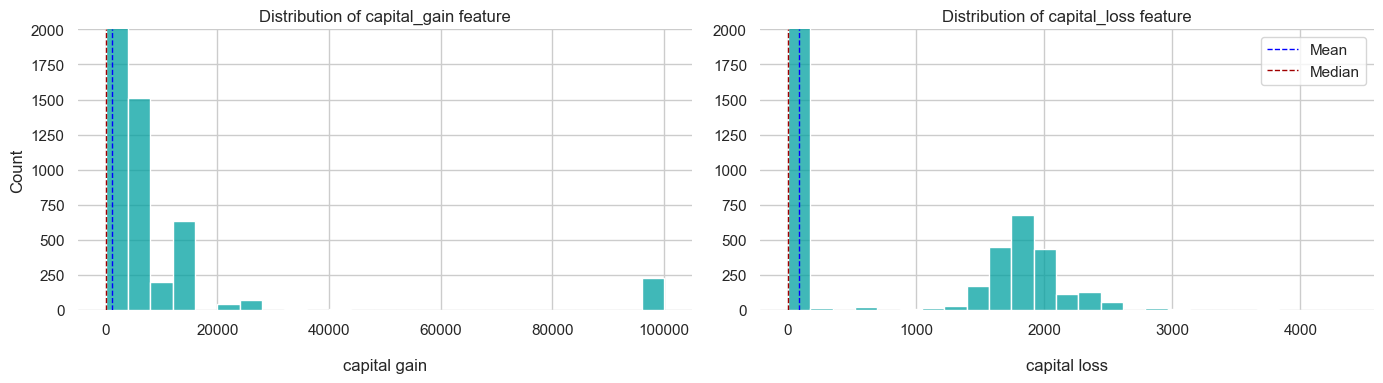

In [11]:
plt.figure(figsize=(14, 4))

# График для признака capital_gain
plt.subplot(1, 2, 1)
plt.box(False)
sns.histplot(df['capital_gain'], bins=25, color='#00A0A0')
plt.axvline(df['capital_gain'].mean(), color='blue', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['capital_gain'].median(), color='#A00000', linestyle='dashed', linewidth=1, label='Median')
plt.title('Distribution of capital_gain feature')
plt.xlabel(xlabel='capital gain', labelpad=15)
plt.ylim(ymax=2000)

# График для признака hours_per_week
plt.subplot(1, 2, 2)
plt.box(False)
sns.histplot(df['capital_loss'], bins=25, color='#00A0A0')
plt.axvline(df['capital_loss'].mean(), color='blue', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['capital_loss'].median(), color='#A00000', linestyle='dashed', linewidth=1, label='Median')
plt.title('Distribution of capital_loss feature')
plt.xlabel(xlabel='capital loss' , labelpad=15)
plt.ylim(ymax=2000)
plt.ylabel('')
plt.legend()

plt.tight_layout()
plt.show()

<h5>On the histogram, we will see a large positive skew for the <i>capital_gain</i> feature and a large negative skew for <i>capital_loss</i></h5>
<h5>Let's try normalizing the data for the <i>capital_gain</i> and <i>capital_loss</i> features.</h5>

In [12]:
skewed = ['capital_gain', 'capital_loss']

features_log_transformed = pd.DataFrame(df).copy()
features_log_transformed[skewed] = df[skewed].apply(lambda x: np.log(x + 1))

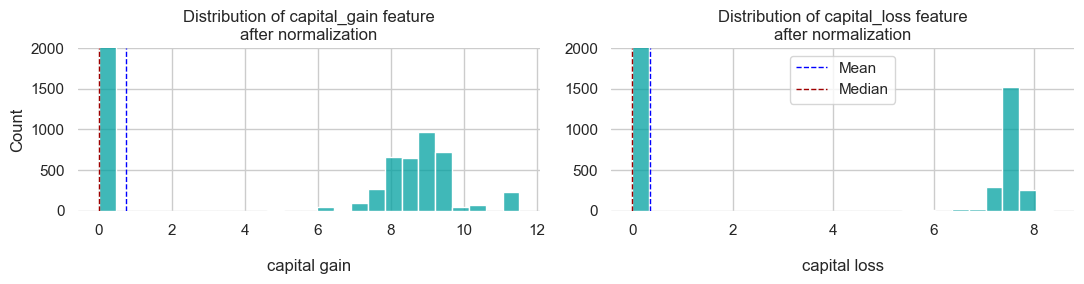

In [13]:
plt.figure(figsize=(11, 3))

# График для признака capital_gain
plt.subplot(1, 2, 1)
plt.box(False)
sns.histplot(features_log_transformed['capital_gain'], bins=25, color='#00A0A0')
plt.axvline(features_log_transformed['capital_gain'].mean(), color='blue', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(features_log_transformed['capital_gain'].median(), color='#A00000', linestyle='dashed', linewidth=1, label='Median')
plt.title('Distribution of capital_gain feature\nafter normalization')
plt.xlabel(xlabel='capital gain', labelpad=15)
plt.ylim(ymax=2000)

# График для признака hours_per_week
plt.subplot(1, 2, 2)
plt.box(False)
sns.histplot(features_log_transformed['capital_loss'], bins=25, color='#00A0A0')
plt.axvline(features_log_transformed['capital_loss'].mean(), color='blue', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(features_log_transformed['capital_loss'].median(), color='#A00000', linestyle='dashed', linewidth=1, label='Median')
plt.title('Distribution of capital_loss feature\nafter normalization')
plt.xlabel(xlabel='capital loss' , labelpad=15)
plt.ylim(ymax=2000)
plt.ylabel('')
plt.legend(loc='upper center')

plt.tight_layout()
plt.show()

<h5>After normalization, the distribution took on a more normal appearance, but this is if we ignore the fact that the majority of people apparently do not have stocks or other instruments capable of generating income and/or capital losses, and for most, income/losses are equal to or nearly equal to zero.</h5>

<h2>Exploratory Data Analysis Sumary:</h2>

<p>The initial analysis involved studying quantitative features using the describe method and exploring their distributions. The dataset portrays an average individual as 38.55 years old, with 10 years of education, and working 40 hours per week.</p>
<p>Key observations include symmetrical distributions for age, education, and hours per week, though outliers may influence this. The capital_gain and capital_loss features exhibit high dispersion, likely due to outliers. Histograms and box plots highlighted distribution characteristics and outlier presence. Normalizing capital_gain and capital_loss data improved normality but didn't negate the prevalence of zero values indicating lack of financial instruments for many individuals.</p>

<h2><a name=machinelearning>Machine Learning:</a></h2>

<h4>Actions included:</h4>

<ul>
    <li>Data preparing</li>
    <li>Algorithms training</li>
    <li>Clustering</li>
</ul>

<p></p>
<p><a href="#exploratorydataanalysis"><< to Exploratory Data Analysisg</a></p>
<p><a href="#projectsumary">to Project Sumary >></a></p>

<h4>Data preparing</h4>

<p>To be able to perform future computations on derived data from the table, we will create a table containing only the income column (which we will revisit later during the analysis), and a table containing all columns except the income column. The table containing only income is called the variable <i>income_raw</i> and the table containing the remaining fields is called <i>features_raw</i>.</p>

In [14]:
income_raw = df[['income']].copy()
features_raw = df.drop('income', axis=1).copy()

In [15]:
income_raw.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [16]:
features_raw.head()

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


<h5>Normalization</h5>

<p>As we remember from the results of applying the <i>describe</i> method to numerical features, each of them has a different range of values. For example, <i>capital_gain</i> reaches a value of 99999, while <i>capital_loss</i> reaches 4356. Differences in the range of values can affect the methods/algorithms we will use later. To minimize the impact of differences in the range of values, we would like all numerical values to be normalized between 0 and 1 (referred to as "Scaling and Min-Max Transformation") - so that each of them will not have a relatively noticeable influence on the various mathematical methods we will use later.</p>

In [17]:
scaler = MinMaxScaler()
features_log_minmax_transform = pd.DataFrame(features_log_transformed).copy()
features_log_minmax_transform = features_log_minmax_transform.drop('income', axis=1)

<h5>Now, to perform scaling, first, let's identify which fields are relevant (numerical columns).</h5>

<p>For this we can simply specify the column names, or we can use the <i>select_dtypes(include=['int64', 'float64'])</i> method from the <i>Pandas</i> library. This will help avoid errors in writing names and in case of adding columns and/or changing the data type of existing ones.</p>

In [18]:
numerical = features_log_minmax_transform.select_dtypes(include=['int64', 'float64']).columns

<h5>Now let's perform scaling of numerical features.</h5>

In [19]:
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])
features_log_minmax_transform.head()

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


<p>To work with learning algorithms, we'll need to convert categorical features into numerical ones. One way to do this is using "one-hot encoding," which is implemented in <i>Pandas</i> with the get_dummies method.</p>

In [20]:
features_final = pd.get_dummies(features_log_minmax_transform)

<p>Now let's transform our <i>income_raw</i> dataframe, which contains a categorical feature indicating income level. Since this feature is binary, i.e., it has only two values, there is no need to use get_dummies. We will simply replace >50K with 1 and <=50K with 0.</p>

In [21]:
income = income_raw['income'].apply(lambda x: 1 if x == '>50K' else 0)
income.unique()

array([0, 1], dtype=int64)

<p>Before training models and conducting clustering, we can build a correlation matrix of features and see which ones are most correlated with income level. Since the numerical features obtained from one-hot encoding will be binary, we will only consider the relationship between the originally numerical features that have values other than 0 and 1.</p>

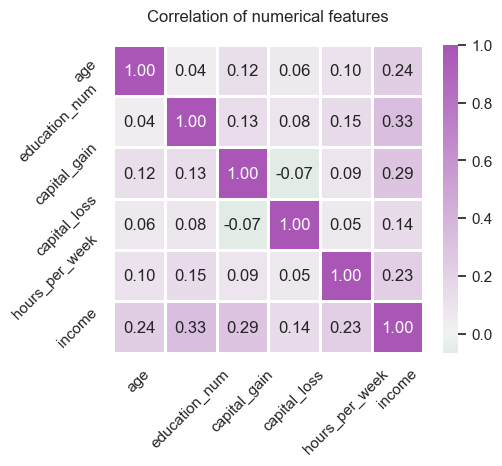

In [22]:
df_cor = pd.merge(features_log_minmax_transform.select_dtypes(include=['int64', 'float64']), income, left_index=True, right_index=True)
cor_matrix = df_cor.corr()
plt.figure(figsize=(5, 4))
cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)
sns.heatmap(cor_matrix, annot=True, cmap=cmap, center=0, fmt='.2f',linewidths=0.9)
plt.title('Correlation of numerical features', y=1.05)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<p>The feature <i>education_num</i>, which represents the number of years of education, shows the highest correlation with <i>income</i>. It wouldn't be accurate to say that this correlation is strong, but we do observe that as the years of education increase, income tends to rise as well. On the other hand, the feature <i>capital_loss</i> exhibits the lowest correlation with income.<p>

<h4>Algorithms training</h4>

<p>Split the features <i>features_final</i> and the target feature <i>income</i> into training and validation sets using the <i>train_test_split</i> command, with a ratio of 80/20 in favor of the training set.</p>

In [23]:
X = features_final
y = income

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<p>Let's check that after splitting into training and validation sets, the total number of records has not changed.</p>

In [24]:
len(X_train) + len(X_test) == len(features_final)

True

In [25]:
len(y_train) + len(y_test) == len(income)

True

<h5>Let's define the <i>train_predict</i> function with the following arguments:</h5>

<ul>
    <li>learner: The algorithm being tested</li>
    <li>sample_size: The size of the sample</li>
    <li>X_train: The training dataset containing the features on which the model will be trained. Each row in the X_train matrix represents one training example, and the columns represent different features</li>
    <li>y_train: The labels for the training dataset. For classification tasks, these will be the classes or categories to which the training examples belong. For regression tasks, these will be numerical values that the model will try to predict</li>
    <li>X_test: The validation (or test) dataset, also containing features. The model trained on X_train and y_train data will be used to predict values on this dataset</li>
    <li>y_test: The corresponding labels for the validation (or test) dataset. These labels are usually used to evaluate the model's performance, not for training. By comparing the model's predicted values with these labels, you can assess how well the model generalizes knowledge to new data</li>
</ul>

<p>The function will return a dictionary object containing performance metrics of the tested algorithm.</p>

In [26]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    '''
    Trains the specified algorithm on the training data and evaluates its performance on the test data.
    Parameters:
        learner (object): Machine learning algorithm object to be trained and evaluated.
        sample_size (int): Size of the training sample used for training.
        X_train (array-like): Feature matrix of the training data.
        y_train (array-like): Label vector of the training data.
        X_test (array-like): Feature matrix of the test data.
        y_test (array-like): Label vector of the test data.
    Returns:
        dict: Dictionary with algorithm performance results including training and prediction time,
              accuracy on training and test sets, as well as the F-beta score on training and test sets.
    '''
    # Initialize dictionary for results
    results = {}

    # Measure training time
    start = time()
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()
    results['train_time'] = end - start

    # Measure prediction time
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time()
    results['pred_time'] = end - start

    # Calculate accuracy and F-beta score
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)

    # Print information about the current algorithm's performance
    print(f'{learner.__class__.__name__} trained on {sample_size} samples.')
    
    return results


<h5>Let's test the following algorithms:</h5>
<ul>
    <li><i>AdaBoostClassifier</i></li>
    <li><i>GradientBoostingClassifier</i></li>
    <li><i>SGDClassifier</i></li>
</ul>

<h5>Initialize the models of the selected algorithms:</h5>

In [27]:
clf_A = AdaBoostClassifier(random_state=0)
clf_B = GradientBoostingClassifier(random_state=0)
clf_C = SGDClassifier(random_state=0)

<h5>Let's define three sample sizes:</h5><ul>
    <li>100% of the data</li>
    <li>10% of the data</li>
    <li>1% of the data</li>
</ul>




In [28]:
samples_100 = int(len(y_train))
samples_10 = int(len(y_train)*.1)
samples_1 = int(len(y_train)*.01)

<p>Now we are ready for testing and plotting graphs.</p>

<p>To address this, let's define another function, <i>compare_learner_performance</i> that takes the output of the train_predict function as an argument.</p>

In [29]:
def compare_learner_performance(results):
    """
    Visualization code to display results of various learners.
    inputs: results: a dictionary containing results from training and evaluating multiple learners
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[int(j/3), j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[int(j/3), j%3].set_xticks([0.45, 1.45, 2.45])
                ax[int(j/3), j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[int(j/3), j%3].set_xlabel("Training Set Size")
                ax[int(j/3), j%3].set_xlim((-0.1, 3.0))

                # Remove spines (borders) around the plot (добавлено)
                ax[int(j/3), j%3].spines['top'].set_visible(False)
                ax[int(j/3), j%3].spines['right'].set_visible(False)
                ax[int(j/3), j%3].spines['bottom'].set_visible(False)
                ax[int(j/3), j%3].spines['left'].set_visible(False)

    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training", y=1.1)
    ax[0, 1].set_title("Accuracy Score on Training Subset", y=1.1)
    ax[0, 2].set_title("F-score on Training Subset", y=1.1)
    ax[1, 0].set_title("Model Predicting", y=1.1)
    ax[1, 1].set_title("Accuracy Score on Testing Set", y=1.1)
    ax[1, 2].set_title("F-score on Testing Set", y=1.1)
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))

    plt.legend(handles = patches,loc = 'lower center')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1)
    plt.tight_layout()
    plt.show()

AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.


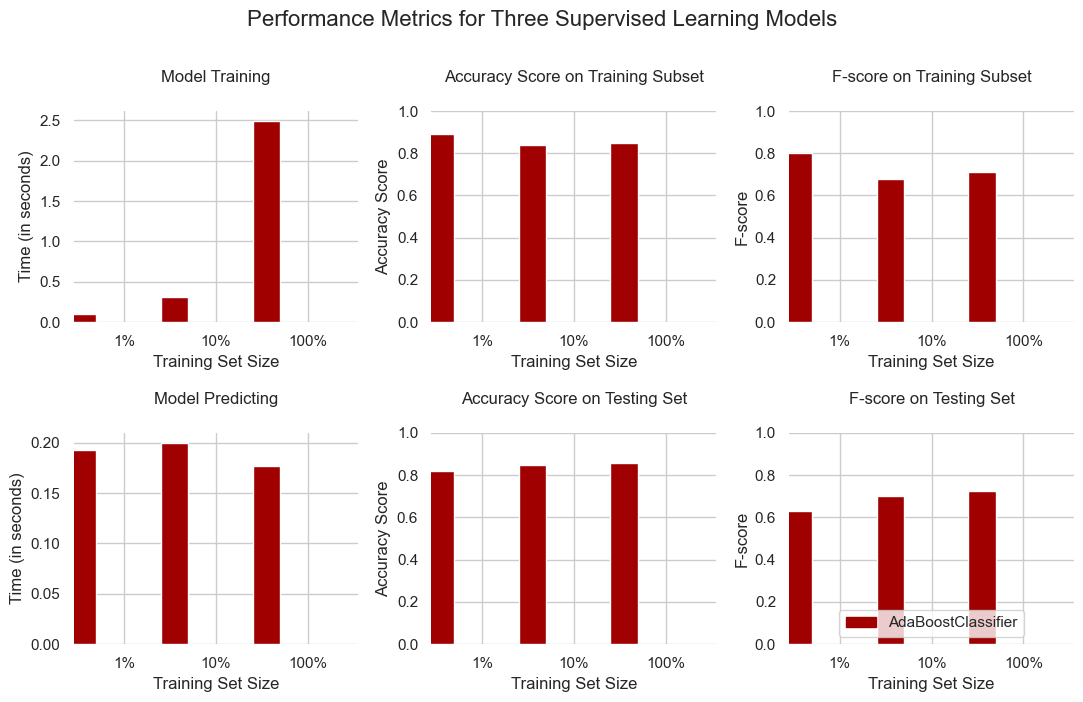

GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.


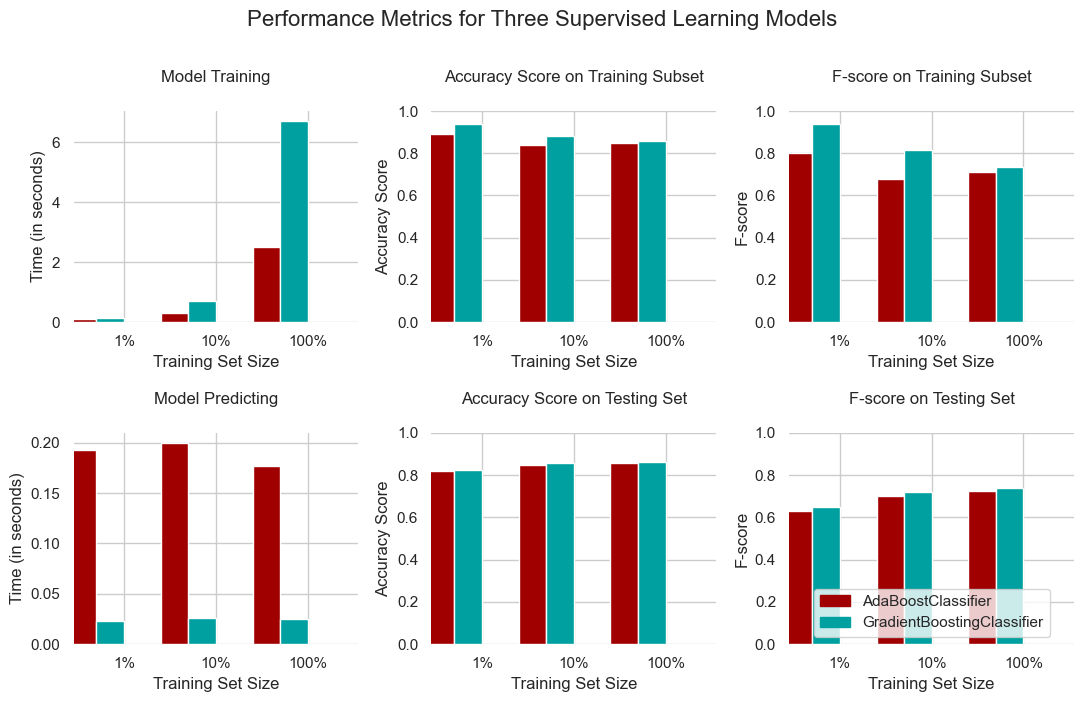

SGDClassifier trained on 361 samples.
SGDClassifier trained on 3617 samples.
SGDClassifier trained on 36177 samples.


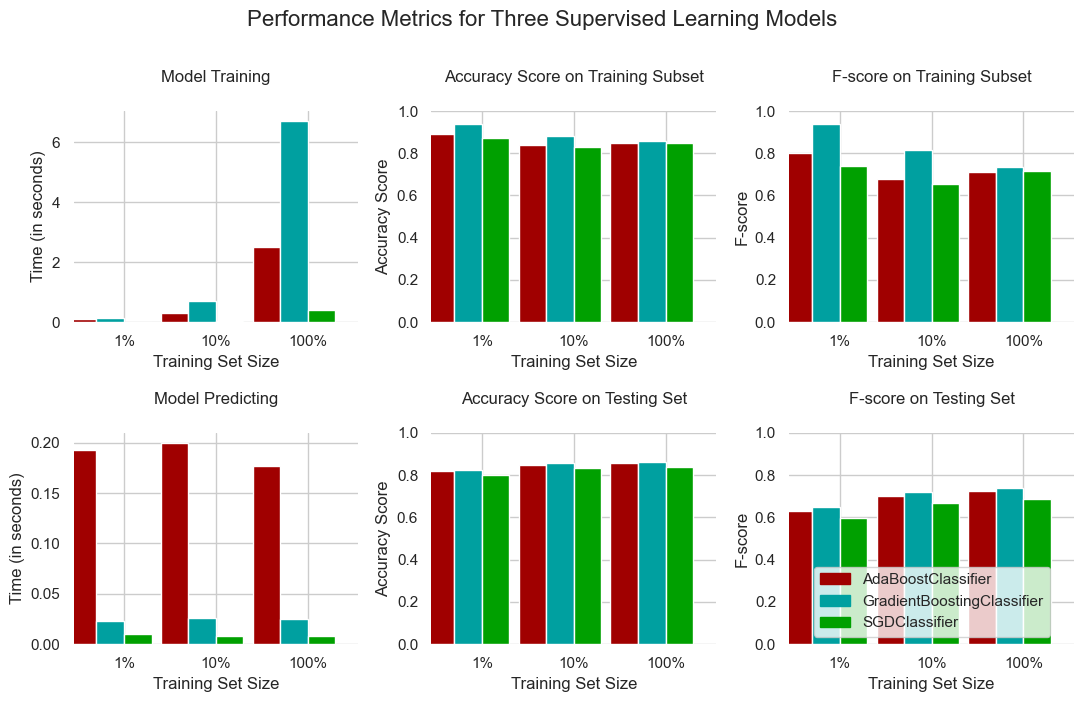

In [30]:
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)
    compare_learner_performance(results)

<h5>Let's analyze the obtained graphs and summarize:</h5>

<p>To obtain results quickly from the provided algorithms, it's best to use <i>SGDClassifier</i>. It shows the shortest training and prediction times across all three sample sizes, making it the optimal choice if getting quick results is important.
If time is not a constraint and accuracy and F-score are the main factors, then <i>GradientBoostingClassifier</i> appears to be the most attractive option. It demonstrates the highest accuracy and F-score values on the test set across all three sample sizes. Although this algorithm takes longer to train, it shows higher performance in terms of accuracy.
It's important to remember that the choice of algorithm depends on specific tasks and goals, as well as time and resource constraints. These conclusions are drawn based on our dataset.</p>

<p>After selecting the algorithm and training the model, we can explore which features have the most impact on the income level.</p>

In [31]:
feature_importances = clf_B.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]  # Sorting indices in descending order of importance
feature_names = list(features_final.columns)
print(f'{"GradientBoostingClassifier - feature weights of the model ":^57}')
print()
for idx in sorted_indices[:10]:  # Output only the first 10 indices
    print(f'|{feature_names[idx]:.<45}{feature_importances[idx]:.6f}|')

GradientBoostingClassifier - feature weights of the model 

|marital_status_Married-civ-spouse............0.393986|
|education_num................................0.201759|
|capital_gain.................................0.200078|
|capital_loss.................................0.062722|
|age..........................................0.054298|
|hours_per_week...............................0.029747|
|occupation_Exec-managerial...................0.016567|
|occupation_Prof-specialty....................0.007867|
|occupation_Other-service.....................0.005912|
|occupation_Farming-fishing...................0.005115|


<p>The features <i>marital status, education duration</i>, and <i>capital gain</i> have the greatest impact on income.</p>

<p>Let's recall that after building the correlation table, <i>marital status</i> and <i>capital gain</i> had the highest correlation coefficient.</p>

<h4>Clustering:</h4>

<p>Perform clustering using the GMM and KMeans algorithms with the number of components ranging from 2 to 7. Find the number of components that provides clusters with the highest silhouette score.</p>
<p>The silhouette score is a statistical measure for evaluating the quality of clustering. It measures how close objects within one cluster are to each other compared to objects from other clusters. The silhouette score can range from -1 to 1:</p>
<ul>
    <li>a value close to +1 indicates good separation between clusters, where objects within the cluster are close to each other, and distances between clusters are large</li>
    <li>a value close to 0 indicates overlapping clusters or unevenly distributed objects within a cluster</li>
    <li>a value close to -1 indicates incorrect separation between clusters, where objects within the cluster are far from each other, and distances between clusters are small</li>
</ul>
<p>Thus, a high silhouette score indicates good clustering, where objects within clusters are tightly grouped, and distances between clusters are large. A low score may indicate poor separation of data into clusters.</p>

<h5>We will perform clustering based on the first 10,000 rows of <i>features_final</i>.</h5>

In [32]:
features_final_clastering = features_final[:10000].copy()
components_range = range(2, 8)
silhouette_scores_gmm = {}
silhouette_scores_kmeans = {}
gmm_labels = {}
kmeans_labels = {}

In [33]:
for n_components in components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(features_final_clastering)
    cluster_labels_gmm = gmm.predict(features_final_clastering)
    silhouette_gmm = silhouette_score(features_final_clastering, cluster_labels_gmm)
    silhouette_scores_gmm[n_components] = silhouette_gmm
    gmm_labels[n_components] = cluster_labels_gmm

    kmeans = KMeans(n_clusters=n_components, n_init=10, random_state=0)
    cluster_labels_kmeans = kmeans.fit_predict(features_final_clastering)
    silhouette_kmeans = silhouette_score(features_final_clastering, cluster_labels_kmeans)
    silhouette_scores_kmeans[n_components] = silhouette_kmeans
    kmeans_labels[n_components] = cluster_labels_kmeans

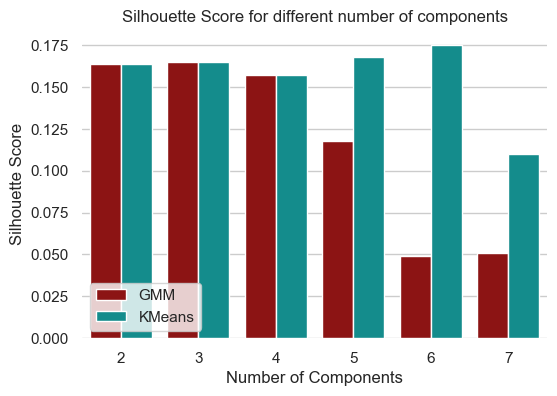

In [34]:
plot_df_gmm = pd.DataFrame(list(silhouette_scores_gmm.items()), columns=['Number of Components', 'Silhouette Score'])
plot_df_gmm['Algorithm'] = 'GMM'
plot_df_kmeans = pd.DataFrame(list(silhouette_scores_kmeans.items()), columns=['Number of Components', 'Silhouette Score'])
plot_df_kmeans['Algorithm'] = 'KMeans'
plot_df = pd.concat([plot_df_gmm, plot_df_kmeans]).reset_index(drop=True)
plot_df['Number of Components'] = plot_df['Number of Components'].astype(str)
plt.figure(figsize=(6, 4))
plt.box(False)
sns.barplot(data=plot_df, x='Number of Components', y='Silhouette Score', hue='Algorithm', dodge=True, palette=['#A00000','#00A0A0'])
plt.legend(loc = 'lower left')
plt.title('Silhouette Score for different number of components')
plt.show()

In [35]:
max_scores = plot_df.groupby('Algorithm')['Silhouette Score'].max().reset_index()
result_df = pd.merge(max_scores, plot_df, on=['Algorithm', 'Silhouette Score'], how='left').set_index('Algorithm')
result_df.sort_values('Silhouette Score', ascending=False)

,Silhouette Score,Number of Components
Algorithm,,
KMeans,0.175194,6
GMM,0.164747,3


<p>As seen from the graph, the silhouette_score values for the GMM and KMeans algorithms are equal when the number of clusters ranges from two to four. However, the maximum silhouette_score value is achieved by the KMeans algorithm when dividing into six clusters. This number of clusters ensures the highest similarity within clusters and maximum dissimilarity between clusters.</p>

<p>Let's examine which features influence income. We will use the cluster_labels_kmeans - cluster numbers assigned to features during clustering - to group the data by clusters and see which features are included in clusters with the highest income indicators.</p>

<p>To do this, we will add an 'income' column, group the data by cluster number, calculate the mean values of features, sort the values in descending order, and display the top ten results.</p>

<p>Since the highest silhouette_score corresponds to six clusters and the KMeans algorithm, we will need kmeans_labels[6] - the cluster numbers saved during clustering.</p>

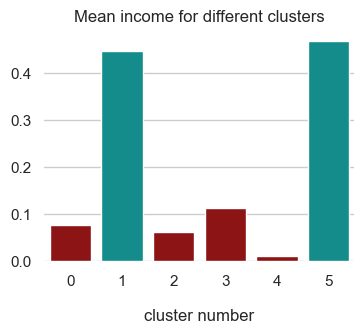

In [36]:
cluster_labels_kmeans = kmeans_labels[6]
data_with_clusters_kmeans = features_final_clastering.copy()
data_with_clusters_kmeans['cluster_num'] = cluster_labels_kmeans
data_with_clusters_kmeans['income'] = income[:10000]
clustered_data_kmeans = data_with_clusters_kmeans.groupby(['cluster_num']).mean()
silhouette_scores = list(clustered_data_kmeans.transpose().loc['income'])
cluster_nums = list(clustered_data_kmeans.transpose().loc['income'].index)

categories = cluster_nums
values = silhouette_scores
plt.figure(figsize=(4, 3))
plt.box(False)
sns.barplot(x=categories, y=values, palette=['#A00000', '#00A0A0', '#A00000', '#A00000', '#A00000',  '#00A0A0'])
plt.title('Mean income for different clusters')
plt.xlabel(xlabel='cluster number', labelpad=15)
plt.show()

<p>We can see that the highest average income is achieved in clusters number one and five.</p>
<p>Now we can look at which features are characteristic of these clusters</p>

In [37]:
claster_five = data_with_clusters_kmeans[data_with_clusters_kmeans['cluster_num'] == 5].drop('income', axis=1)
claster_five.mean().sort_values(ascending=False).head(10)

cluster_num                          5.000000
sex_Female                           1.000000
marital_status_Married-civ-spouse    0.994141
relationship_Wife                    0.949219
native_country_United-States         0.873047
race_White                           0.837891
workclass_Private                    0.722656
education_num                        0.626432
hours_per_week                       0.371094
education_level_HS-grad              0.353516
dtype: float64

In [38]:
claster_one = data_with_clusters_kmeans[data_with_clusters_kmeans['cluster_num'] == 1].drop('income', axis=1)
claster_one.mean().sort_values(ascending=False).head(10)

cluster_num                          1.000000
sex_Male                             1.000000
marital_status_Married-civ-spouse    0.999275
relationship_Husband                 0.992021
native_country_United-States         0.909091
race_White                           0.904255
workclass_Private                    0.675774
education_num                        0.622050
hours_per_week                       0.444842
age                                  0.355555
dtype: float64

<h2><a name="projectsumary"></a>Project Sumary:</h2>
<p>The goal of the project was to identify features that distinguish people earning above a certain income threshold. After preprocessing the data, we tested three different machine learning algorithms for performance and accuracy. We also conducted data clustering and determined the optimal division.</p>.
<p>Among the tested algorithms: AdaBoostClassifier, GradientBoostingClassifier, and SGDClassifier, the fastest was SGDClassifier. It demonstrated the shortest training and prediction time. However, we chose GradientBoostingClassifier because our dataset is not very large, and speed is not a critical factor. In our case, accuracy and F-score were the main considerations, and GradientBoostingClassifier showed the highest values for these metrics. Although this algorithm required more training time, it exhibited higher prediction accuracy.</p>y<p>.

After training the model, we examined the weight assigned to each feature. The three most influential features </p>were:

Marital Status with a weight of 0.393986;
Education Level with 0.201759;
Capital Gain with 0.200078.
Next, we attempted to cluster our data to determine the number of components that provide clusters with the highest silhouette metric. We used GMM and KMeans algorithms for this purpose.

The silhouette metric is a statistical measure for assessing clustering quality. The optimal number of clusters turned out to be six, with the KMeans algorithm showing a higher silhouette score.

After obtaining cluster numbers, we grouped our data and calculated the average values for all features to identify clusters with the maximum target feature value - income. These clusters were found to be clusters one and five. Upon closer inspection, cluster five consisted of females, while cluster one comprised males. Analyzing features with the highest values, we are ready to answer the main question.

The features that most distinguish people earning a high annual salary (above 180,000 shekels per year) from those earning a low salary (below this amount) are:

Marital Status;
Country of Origin;
Race;
Employment Type;
Education Level;


<p><a href="#contents">^ Back To Contents</a></p>Number of Hours Worked.

<h2><a name="projectsumary"></a>Project Sumary:</h2>

<p>The goal of the project was to identify features that distinguish people earning above a certain income threshold. After preprocessing the data, we tested three different machine learning algorithms for performance and accuracy. We also conducted data clustering and determined the optimal division.</p>

<p>Among the tested algorithms: AdaBoostClassifier, GradientBoostingClassifier, and SGDClassifier, the fastest was SGDClassifier. It demonstrated the shortest training and prediction time. However, we chose GradientBoostingClassifier because our dataset is not very large, and speed is not a critical factor. In our case, accuracy and F-score were the main considerations, and GradientBoostingClassifier showed the highest values for these metrics. Although this algorithm required more training time, it exhibited higher prediction accuracy.</p>

<p>After training the model, we examined the weight assigned to each feature. The three most influential features were:</p>
<ul>
    <li>Marital Status with a weight of 0.393986</li>
    <li>Education Level with 0.201759</li>
    <li>Capital Gain with 0.200078</li>
</ul>

<p>Next, we attempted to cluster our data to determine the number of components that provide clusters with the highest silhouette metric. We used GMM and KMeans algorithms for this purpose.</p>

<p>The silhouette metric is a statistical measure for assessing clustering quality. The optimal number of clusters turned out to be six, with the KMeans algorithm showing a higher silhouette score.</p>

<p>After obtaining cluster numbers, we grouped our data and calculated the average values for all features to identify clusters with the maximum target feature value - income. These clusters were found to be clusters one and five. Upon closer inspection, cluster five consisted of females, while cluster one comprised males. Analyzing features with the highest values, we are ready to answer the main question.</p>

<p>The features that most distinguish people earning a high annual salary (above 180,000 shekels per year) from those earning a low salary (below this amount) are:</p>
<ul>
    <li>marital status</li>
    <li>country of origin</li>
    <li>race</li>
    <li>employment type</li>
    <li>education level</li>
    <li>number of hours worked</li>
</ul>

<p><a href="#contents">^ Back To Contents</a></p>